Подключение необходимых модулей:
Для обучения используем 4 различных модели
Для оценки результата используется Средняя абсолютная ошибка (MAE)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

Скачиваем необходимый датасет с Kaggle
Просматриваем содержимое
Проверяем датасет на пропуски

In [ ]:
od.download( 
    "https://www.kaggle.com/competitions/playground-series-s3e16") 
pd.set_option("display.max_columns", None)
train_df = pd.read_csv(r'C:\Users\User\Desktop\project\playground-series-s3e16\train.csv')
test_df = pd.read_csv(r'C:\Users\User\Desktop\project\playground-series-s3e16\test.csv')
print(train_df.head())
print(train_df.columns)
print(train_df.isnull().sum())

Пропусков не обнаружено
Обнаруженные категориальные признаки необходимо закодировать

In [ ]:
lab_encoder = LabelEncoder()
for i in train_df.columns:
    if train_df[i].dtype == 'object':
        train_df[i] = lab_encoder.fit_transform(train_df[i])
        label_mapping = dict(zip(lab_encoder.classes_, lab_encoder.transform(lab_encoder.classes_)))
        print(label_mapping)

lab_encoder = LabelEncoder()
for i in test_df.columns:
    if test_df[i].dtype == 'object':
        test_df[i] = lab_encoder.fit_transform(test_df[i])
        label_mapping = dict(zip(lab_encoder.classes_, lab_encoder.transform(lab_encoder.classes_)))
        print(label_mapping)

Визуализируем корреляцию признаков

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.drop(['id','Sex'],axis=1).corr(),annot=True,cmap='Reds')
plt.show()

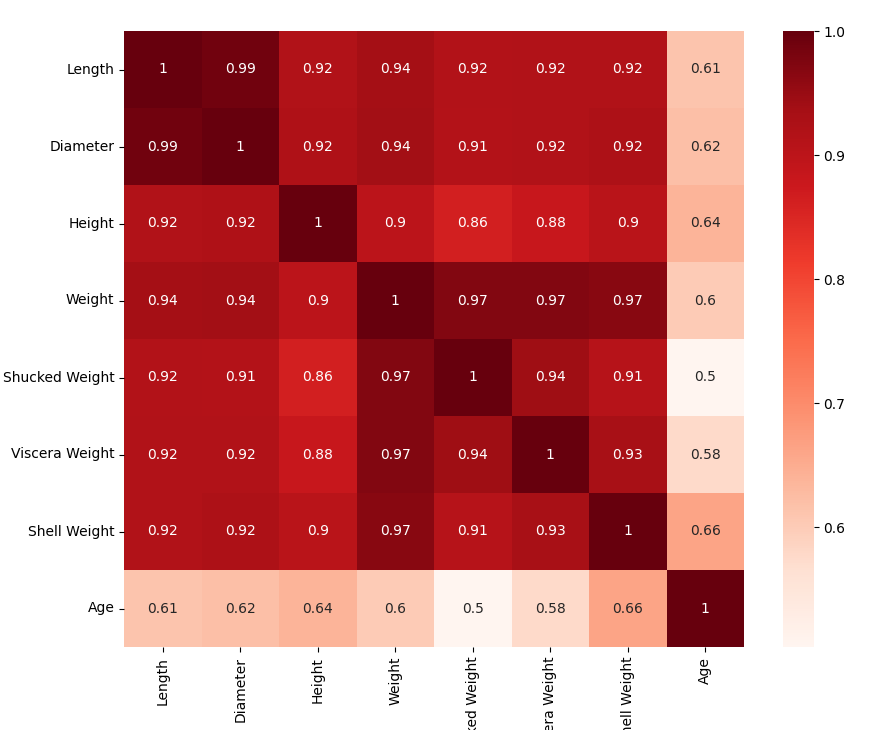

По очереди проверим каждый признак на наличие выбросов и уберём аномальные значения

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Length'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Length']<0.58].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Diameter'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Diameter']<0.47].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Height'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Height']>0.6].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Weight'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Weight']>60].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Shucked Weight'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Shucked Weight']>27].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Viscera Weight'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Viscera Weight']>13.2].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Shell Weight'])
#plt.show()

Разделяем датасет и приступаем к обучению:

In [ ]:
train_df=train_df.drop(train_df[train_df['Shell Weight']>17].index)

X=train_df.drop('Age',axis=1)
y=np.ravel(train_df[['Age']])
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#model = LogisticRegression(solver='saga', max_iter=2000, C=1)
#model.fit(X_train, y_train)
#model = RandomForestRegressor(random_state=0, n_estimators=400)
#model.fit(X_train, y_train)
model = GradientBoostingRegressor(random_state=0, n_estimators= 600, learning_rate=0.07)
model.fit(X_train, y_train)
#model = LinearRegression()
#model.fit(X_train, y_train)

Проверяем точность прогноза выбранной модели:

In [ ]:
pred=model.predict(X_test)
mae=mean_absolute_error(y_test, pred)
print('Mean Absolute Error : ',round(mae,5))
mape = mean_absolute_percentage_error(y_test, pred)
print('Mean Absolute Percentage Error : ',round(mape,5))

После настройки параметров моделей и их перебора, выводим результат лучшей модели в файл

In [ ]:
prediction=np.round(model.predict(test_df)).astype(int)
result=pd.DataFrame({'id':test_df.id,'Age':prediction})
result.to_csv('submission.csv',index=False)

Полный код:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
od.download( 
    "https://www.kaggle.com/competitions/playground-series-s3e16") 
pd.set_option("display.max_columns", None)
train_df = pd.read_csv(r'C:\Users\User\Desktop\project\playground-series-s3e16\train.csv')
test_df = pd.read_csv(r'C:\Users\User\Desktop\project\playground-series-s3e16\test.csv')
print(train_df.head())
print(train_df.columns)
print(train_df.isnull().sum())

lab_encoder = LabelEncoder()
for i in train_df.columns:
    if train_df[i].dtype == 'object':
        train_df[i] = lab_encoder.fit_transform(train_df[i])
        label_mapping = dict(zip(lab_encoder.classes_, lab_encoder.transform(lab_encoder.classes_)))
        print(label_mapping)

lab_encoder = LabelEncoder()
for i in test_df.columns:
    if test_df[i].dtype == 'object':
        test_df[i] = lab_encoder.fit_transform(test_df[i])
        label_mapping = dict(zip(lab_encoder.classes_, lab_encoder.transform(lab_encoder.classes_)))
        print(label_mapping)

# Визуализируем корреляцию признаков
plt.figure(figsize=(10,8))
sns.heatmap(train_df.drop(['id','Sex'],axis=1).corr(),annot=True,cmap='Reds')
plt.show()
# Проверяем выбросы по каждому показателю
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Length'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Length']<0.58].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Diameter'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Diameter']<0.47].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Height'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Height']>0.6].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Weight'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Weight']>60].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Shucked Weight'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Shucked Weight']>27].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Viscera Weight'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Viscera Weight']>13.2].index)
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Shell Weight'])
#plt.show()
train_df=train_df.drop(train_df[train_df['Shell Weight']>17].index)

X=train_df.drop('Age',axis=1)
y=np.ravel(train_df[['Age']])
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#model = LogisticRegression(solver='saga', max_iter=2000, C=1)
#model.fit(X_train, y_train)
#model = RandomForestRegressor(random_state=0, n_estimators=400)
#model.fit(X_train, y_train)
model = GradientBoostingRegressor(random_state=0, n_estimators= 600, learning_rate=0.07)
model.fit(X_train, y_train)
#model = LinearRegression()
#model.fit(X_train, y_train)
pred=model.predict(X_test)
mae=mean_absolute_error(y_test, pred)
print('Mean Absolute Error : ',round(mae,5))
mape = mean_absolute_percentage_error(y_test, pred)
print('Mean Absolute Percentage Error : ',round(mape,5))

prediction=np.round(model.predict(test_df)).astype(int)
result=pd.DataFrame({'id':test_df.id,'Age':prediction})
result.to_csv('submission.csv',index=False)